In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [197]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20between%20%272019-03-11T00:00:00%27%20and%20%272019-03-12T00:00:00%27"
data = pd.read_json(url)

In [253]:
data = pd.read_csv("311_311.csv")

In [254]:
data.shape

(1000, 41)

In [255]:
data.head()

,Unnamed: 0,address_type,agency,agency_name,bbl,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,...,resolution_description,road_ramp,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,resolution_outcome
0,0,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.002240e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,WATTS STREET,NaN,NaN,41935505,981542.0,203092.0,0
1,1,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.002240e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,WATTS STREET,NaN,NaN,41929434,981542.0,203092.0,0
2,2,LATLONG,DOHMH,Department of Health and Mental Hygiene,NaN,QUEENS,NaN,NaN,NaN,ELMHURST,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,45 AVENUE,NaN,NaN,41932348,1020716.0,210495.0,0
3,3,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.020360e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,FREDRICK DOUGLASS BOULEVARD,NaN,NaN,41929359,1001052.0,240370.0,0
4,4,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.005260e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,MACDOUGAL STREET,NaN,NaN,41936077,983869.0,204858.0,1


In [260]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [261]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

In [41]:
data['complaint_type'].value_counts()

HEAT/HOT WATER                         146
Noise - Residential                    117
Illegal Parking                         97
Rodent                                  91
Street Condition                        85
Blocked Driveway                        56
Noise - Commercial                      39
Request Large Bulky Item Collection     33
UNSANITARY CONDITION                    32
Noise                                   25
Noise - Vehicle                         25
Noise - Street/Sidewalk                 22
Traffic Signal Condition                15
Street Light Condition                  14
Non-Emergency Police Matter             13
PAINT/PLASTER                           11
Sanitation Condition                    11
Missed Collection (All Materials)       10
DOOR/WINDOW                              8
PLUMBING                                 8
Derelict Vehicles                        8
Derelict Vehicle                         8
WATER LEAK                               8
ELECTRIC   

In [20]:
data['agency'].value_counts()

NYPD     387
HPD      230
DOT      124
DOHMH    104
DSNY      77
DEP       44
DOB       16
DPR        7
TLC        5
DFTA       2
DCA        2
DHS        1
DOITT      1
Name: agency, dtype: int64

In [9]:
data['agency_name'].value_counts()

New York City Police Department                       386
Department of Housing Preservation and Development    230
Department of Transportation                          124
Department of Health and Mental Hygiene               103
Department of Environmental Protection                 44
Department of Sanitation                               39
Department of Buildings                                16
BCC - Brooklyn South                                   10
Department of Parks and Recreation                      7
BCC - Queens East                                       6
BCC - Queens West                                       5
Taxi and Limousine Commission                           5
A - Brooklyn                                            3
Department for the Aging                                2
Department of Consumer Affairs                          2
A - Manhattan                                           1
Bronx 11                                                1
Bronx 03      

In [9]:
data['complaint_type'][data['agency']=='NYPD'].value_counts()

Noise - Residential            117
Illegal Parking                 97
Blocked Driveway                56
Noise - Commercial              39
Noise - Vehicle                 25
Noise - Street/Sidewalk         22
Non-Emergency Police Matter     13
Derelict Vehicle                 8
Traffic                          4
Animal Abuse                     3
Homeless Encampment              2
Drinking                         1
Name: complaint_type, dtype: int64

In [10]:
data['complaint_type'][data['agency']=='HPD'].value_counts()

HEAT/HOT WATER            146
UNSANITARY CONDITION       32
PAINT/PLASTER              11
PLUMBING                    8
WATER LEAK                  8
DOOR/WINDOW                 8
ELECTRIC                    6
FLOORING/STAIRS             4
GENERAL                     3
HPD Literature Request      2
ELEVATOR                    1
APPLIANCE                   1
Name: complaint_type, dtype: int64

In [13]:
data['complaint_type'][data['agency']=='DOT'].value_counts()

Street Condition              85
Traffic Signal Condition      15
Street Light Condition        14
Ferry Complaint                2
Bus Stop Shelter Complaint     2
Sidewalk Condition             2
Curb Condition                 1
Street Sign - Damaged          1
Ferry Inquiry                  1
Highway Condition              1
Name: complaint_type, dtype: int64

In [18]:
[data['borough'].value_counts()]

[BROOKLYN         360
 QUEENS           219
 BRONX            185
 MANHATTAN        182
 STATEN ISLAND     44
 Unspecified       10
 Name: borough, dtype: int64]

In [35]:
data['complaint_type'][data['borough']=='BRONX'].value_counts()

HEAT/HOT WATER                         41
Noise - Residential                    31
Street Condition                       27
Rodent                                 15
Illegal Parking                        14
Blocked Driveway                       10
Noise - Vehicle                         5
Noise - Street/Sidewalk                 4
UNSANITARY CONDITION                    4
GENERAL                                 3
PAINT/PLASTER                           3
Traffic Signal Condition                3
Elevator                                3
Noise - Commercial                      2
Street Light Condition                  2
Sanitation Condition                    2
DOOR/WINDOW                             2
ELECTRIC                                2
Traffic                                 1
Food Establishment                      1
PLUMBING                                1
Air Quality                             1
Derelict Vehicles                       1
New Tree Request                  

In [171]:
data['resolution_description'].nunique()

92

In [35]:
data['complaint_type'][data['agency']=='DOT'].value_counts()

Street Condition              85
Traffic Signal Condition      15
Street Light Condition        14
Ferry Complaint                2
Sidewalk Condition             2
Bus Stop Shelter Complaint     2
Curb Condition                 1
Ferry Inquiry                  1
Street Sign - Damaged          1
Highway Condition              1
Name: complaint_type, dtype: int64

In [36]:
data['resolution_description'][data['agency']=='DOT'].nunique()

18

In [37]:
data['resolution_description'][data['agency']=='DOT'].value_counts()

The Department of Transportation inspected this complaint and repaired the problem.                                                                                                                                                                                                                                                                                                                                                                                                    70
Service Request status for this request is available on the Department of Transportationâs website. Please click the âLearn Moreâ link below.                                                                                                                                                                                                                                                                                                                                    27
The Department of Transportation determined that thi

In [21]:
data['resolution_description'][data['agency']=='HPD'].nunique()

13

In [22]:
data['resolution_description'][data['agency']=='DOT'].nunique()

18

In [ ]:
#create new column 'pn_resolution' if resolution had a positive outcome or not
data['pn_resolution'] = 

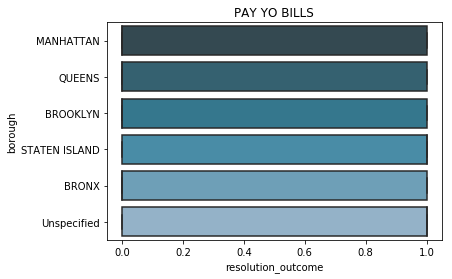

In [265]:
sns.boxplot(y = data['borough'] , x = data['resolution_outcome'], data = data, palette= 'PuBuGn_d').set_title('PAY YO BILLS')
plt.show()

/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


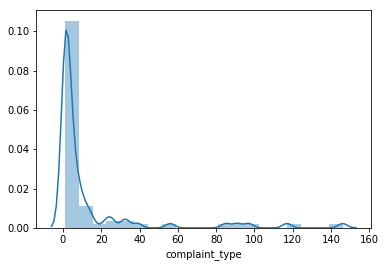

In [263]:
sns.distplot(data['resontu'].value_counts(), bins=20)

In [45]:
data['resolution_description'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                 136
The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status                                                                                                                                                                                                                                                                 95
The complaint yo

In [45]:
data['resolution_outcome'] = [1 if re.search(\bno evidence|\bnot necessary|\bwere gone|\bunable to gain|\binsufficient contact|\bdoes not fall under|\bNo violations|\bnot able to gain access|\bcall 311 in 30 days|\bstatus 14 days|\b45 days after|\bno condition at|\bno violation at|\bfind any E-Waste|\bnot observe a violation|\bnot find the problem|\bcannot take action|\binside condition|\bno indication|\bfurther investigation is required|\brequires contact with|\bfor further action|\battempted to investigate|\bwas not found|\bup to 24 months|\bWithin 30 days|\bdid not find|\bmore than six months ago|\bnot have sufficient|\bcurb contract|\btemporarily addressed|\bmaximum of 30 days|\bunable to find) else 0 for x in data['resolution_description']]

SyntaxError: unexpected character after line continuation character (<ipython-input-45-21d22c331541>, line 1)

In [145]:
#positive
reg = "\btook action to fix|\bsummons in response|\bprovided additional information|\breport was prepared|\bduplicate of a condition|\badvised by a tenant|\bViolations were issued|\bconducted or attempted|\bViolations were previously|\bconditions were corrected|\bconditions are still open|\bwithin 24 hours|\bwithin 7 days|\bwarning them|\bremoved the items|\bcollected the E-waste|\bissued a Notice|\baddressed the issue|\bcollected the requested|\bcleaned the location|\bpicked up the items|\bduplicate of a previously|\bcomplainant's request|\bit could be closed|\bdefect found done|\brunning hydrant|\bperformed repair work|\bno asbestos was|\bflush water mains|\breplaced the damaged|\bresolved the issue|\bduplicate to another|\bno further action|\bwere addressed|\bissued an Office|\bperformed the work|\bcompleted the request|\bNo work is necessary|\bvisit the location|\brepaired the problem|\brequest is available on|\bYou can find additional information|\bmeets resurfacing|\bproblem was fixed|\bhas been completed|\bto address the issue|\bvalid permit|\bdefect was found"

In [199]:
#positive - + at end
reg = "took action to fix+|summons in response+|provided additional information+|report was prepared+|duplicate of a condition+|advised by a tenant|Violations were issued+|bconducted or attempted+|Violations were previously+|conditions were corrected+|conditions are still open+|within 24 hours+|within 7 days+|warning them+|removed the items+|collected the E-waste+|issued a Notice+|addressed the issue+|collected the requested+|cleaned the location+|picked up the items+|duplicate of a previously+|complainant's request+|it could be closed+|defect found done+|running hydrant+|performed repair work+|no asbestos was+|flush water mains+|replaced the damaged+|resolved the issue+|duplicate to another+|no further action+|were addressed+|issued an Office+|performed the work+|completed the request+|No work is necessary+|visit the location+|repaired the problem+|request is available on+|You can find additional information+|meets resurfacing+|problem was fixed+|has been completed+|to address the issue+|valid permit+|defect was found+"


In [221]:
#positive - just the string and |

reg = "took action to fix|summons in response|provided additional information|report was prepared|duplicate of a condition|advised by a tenant|Violations were issued|bconducted or attempted|Violations were previously|conditions were corrected|conditions are still open|within 24 hours|within 7 days|warning them|removed the items|collected the E-waste|issued a Notice|addressed the issue|collected the requested|cleaned the location|picked up the items|duplicate of a previously|complainant's request|it could be closed|defect found done|running hydrant|performed repair work|no asbestos was|flush water mains|replaced the damaged|resolved the issue|duplicate to another|no further action|were addressed|issued an Office|performed the work|completed the request|No work is necessary|visit the location|repaired the problem|request is available on|You can find additional information|meets resurfacing|problem was fixed|has been completed|to address the issue|valid permit|defect was found"


In [200]:
data['resolution_outcome'] = bool([re.search(reg, str(x)) for x in data['resolution_description']])

In [266]:
data['resolution_outcome'].value_counts()

0    614
1    386
Name: resolution_outcome, dtype: int64

In [225]:
bool(re.search(reg, "The Department of Transportation has completed the request or corrected the condition."))

True

In [212]:
bool([re.search(reg, str(data['resolution_description']))])

True

In [123]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

In [161]:
data = data.drop(['address_type', 'bbl', 'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'community_board',
       'cross_street_1', 'cross_street_2',
       'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'road_ramp',
       'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'], axis=1)

In [236]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

In [167]:
data['status'].value_counts()

Closed      972
Assigned     23
Open          4
Started       1
Name: status, dtype: int64

In [241]:
fix = data.drop(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'], axis=1)

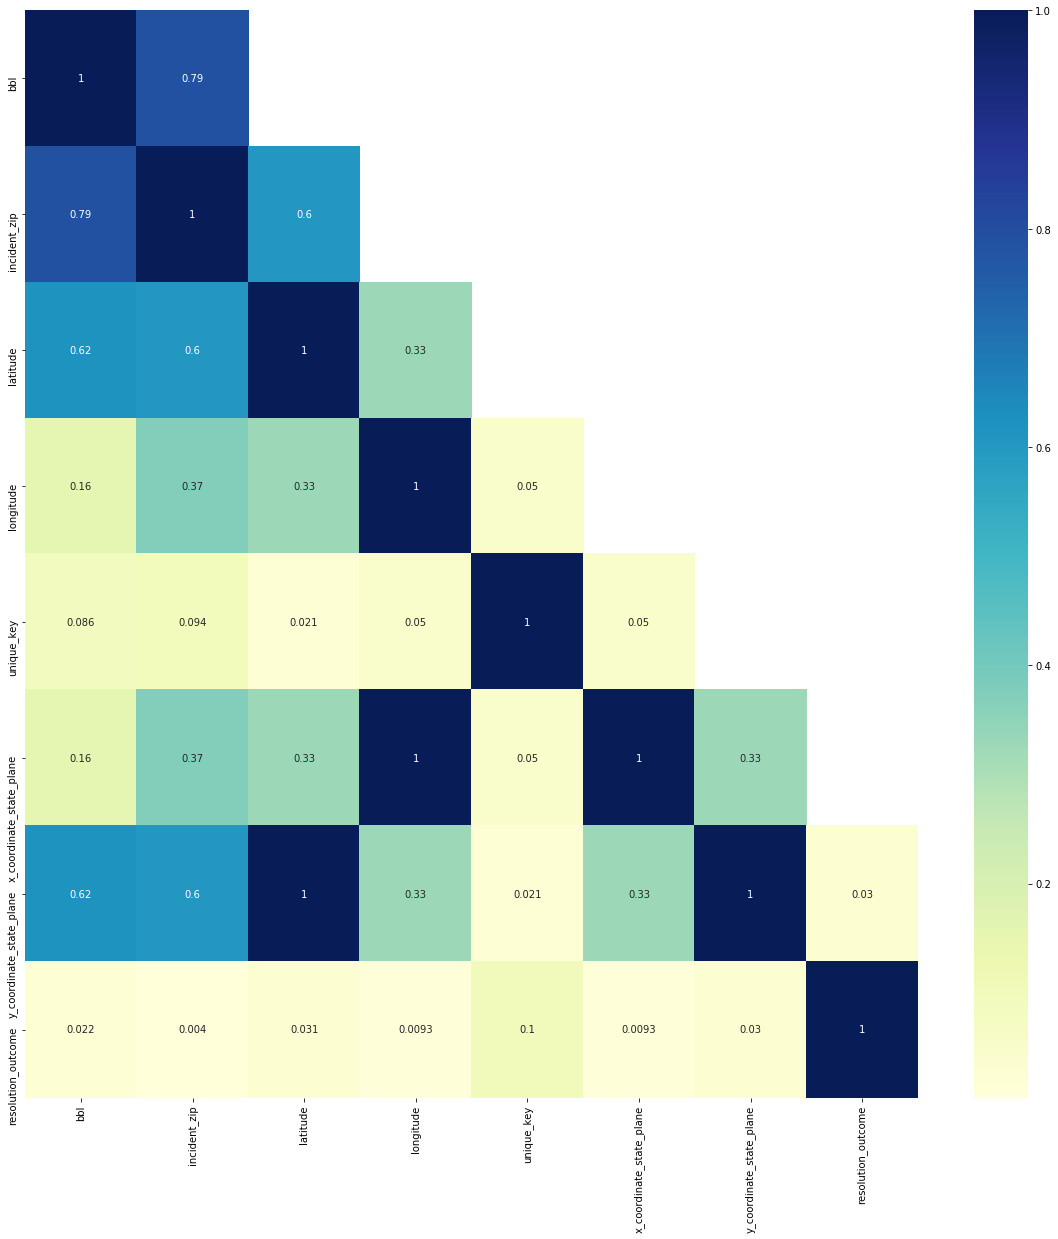

In [268]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap="YlGnBu")

Target Variable


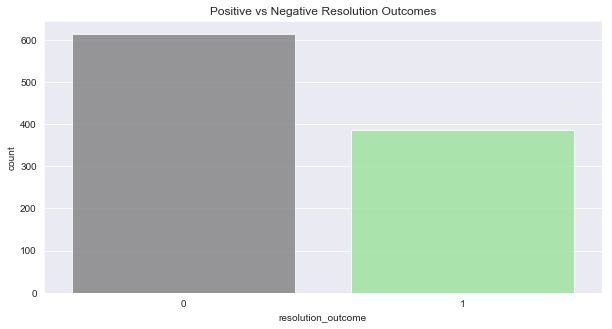

In [272]:
# Default Count
print('Target Variable')
# print(data.groupby(['default payment next month']).SEX.count())

# To get a sense of the data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(data['resolution_outcome'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Positive vs Negative Resolution Outcomes')
# plt.ylabel('# ')
plt.show()

In [275]:
print(data.groupby(['borough','resolution_outcome']).borough.count().unstack())
pclass = data.groupby(['borough','resolution_outcome']).borough.count().unstack()

resolution_outcome    0    1
borough                     
BRONX               110   75
BROOKLYN            232  128
MANHATTAN           119   63
QUEENS              131   88
STATEN ISLAND        18   26
Unspecified           4    6


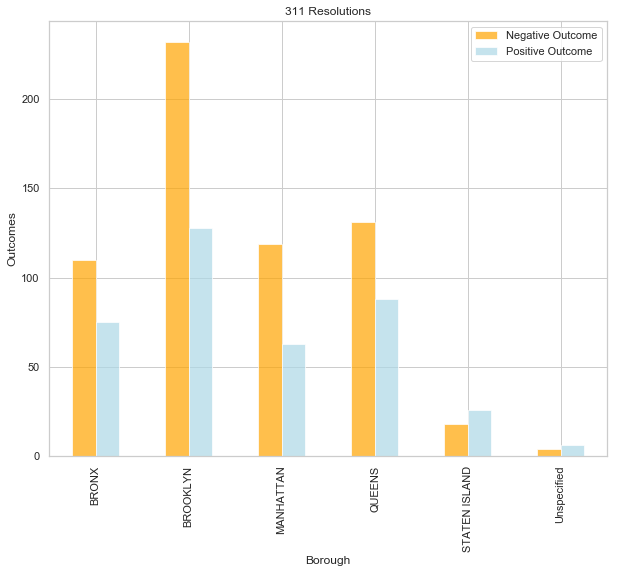

In [348]:
# plt.figure(figsize = (200,100))
p1 = pclass.plot(kind = 'bar', stacked = False, 
                   title = '311 Resolutions', 
                   color = ['orange','lightblue'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

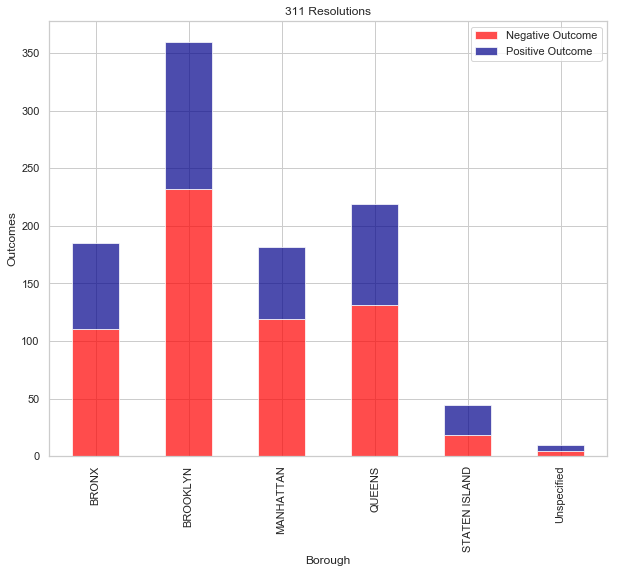

In [355]:
# plt.figure(figsize = (200,100))
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = '311 Resolutions', 
                   color = ['red','darkblue'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

In [288]:
print(data.groupby(['agency','resolution_outcome']).borough.count().unstack())
pclass1 = data.groupby(['agency','resolution_outcome']).borough.count().unstack()

resolution_outcome      0      1
agency                          
DCA                   NaN    2.0
DEP                  29.0   15.0
DFTA                  NaN    2.0
DHS                   1.0    NaN
DOB                   1.0   15.0
DOHMH                97.0    7.0
DOITT                 NaN    1.0
DOT                  14.0  110.0
DPR                   3.0    4.0
DSNY                 53.0   24.0
HPD                 155.0   75.0
NYPD                256.0  131.0
TLC                   5.0    NaN


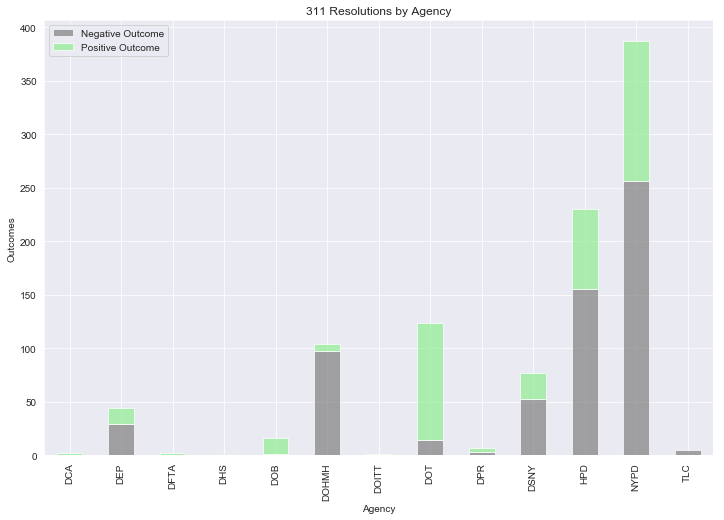

In [318]:
p1 = pclass1.plot(kind = 'bar', stacked = True, 
                   title = '311 Resolutions by Agency', 
                   color = ['grey','lightgreen'], alpha = .70, figsize = (12,8))
p1.set_xlabel('Agency')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show();

/Users/fhel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fhel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


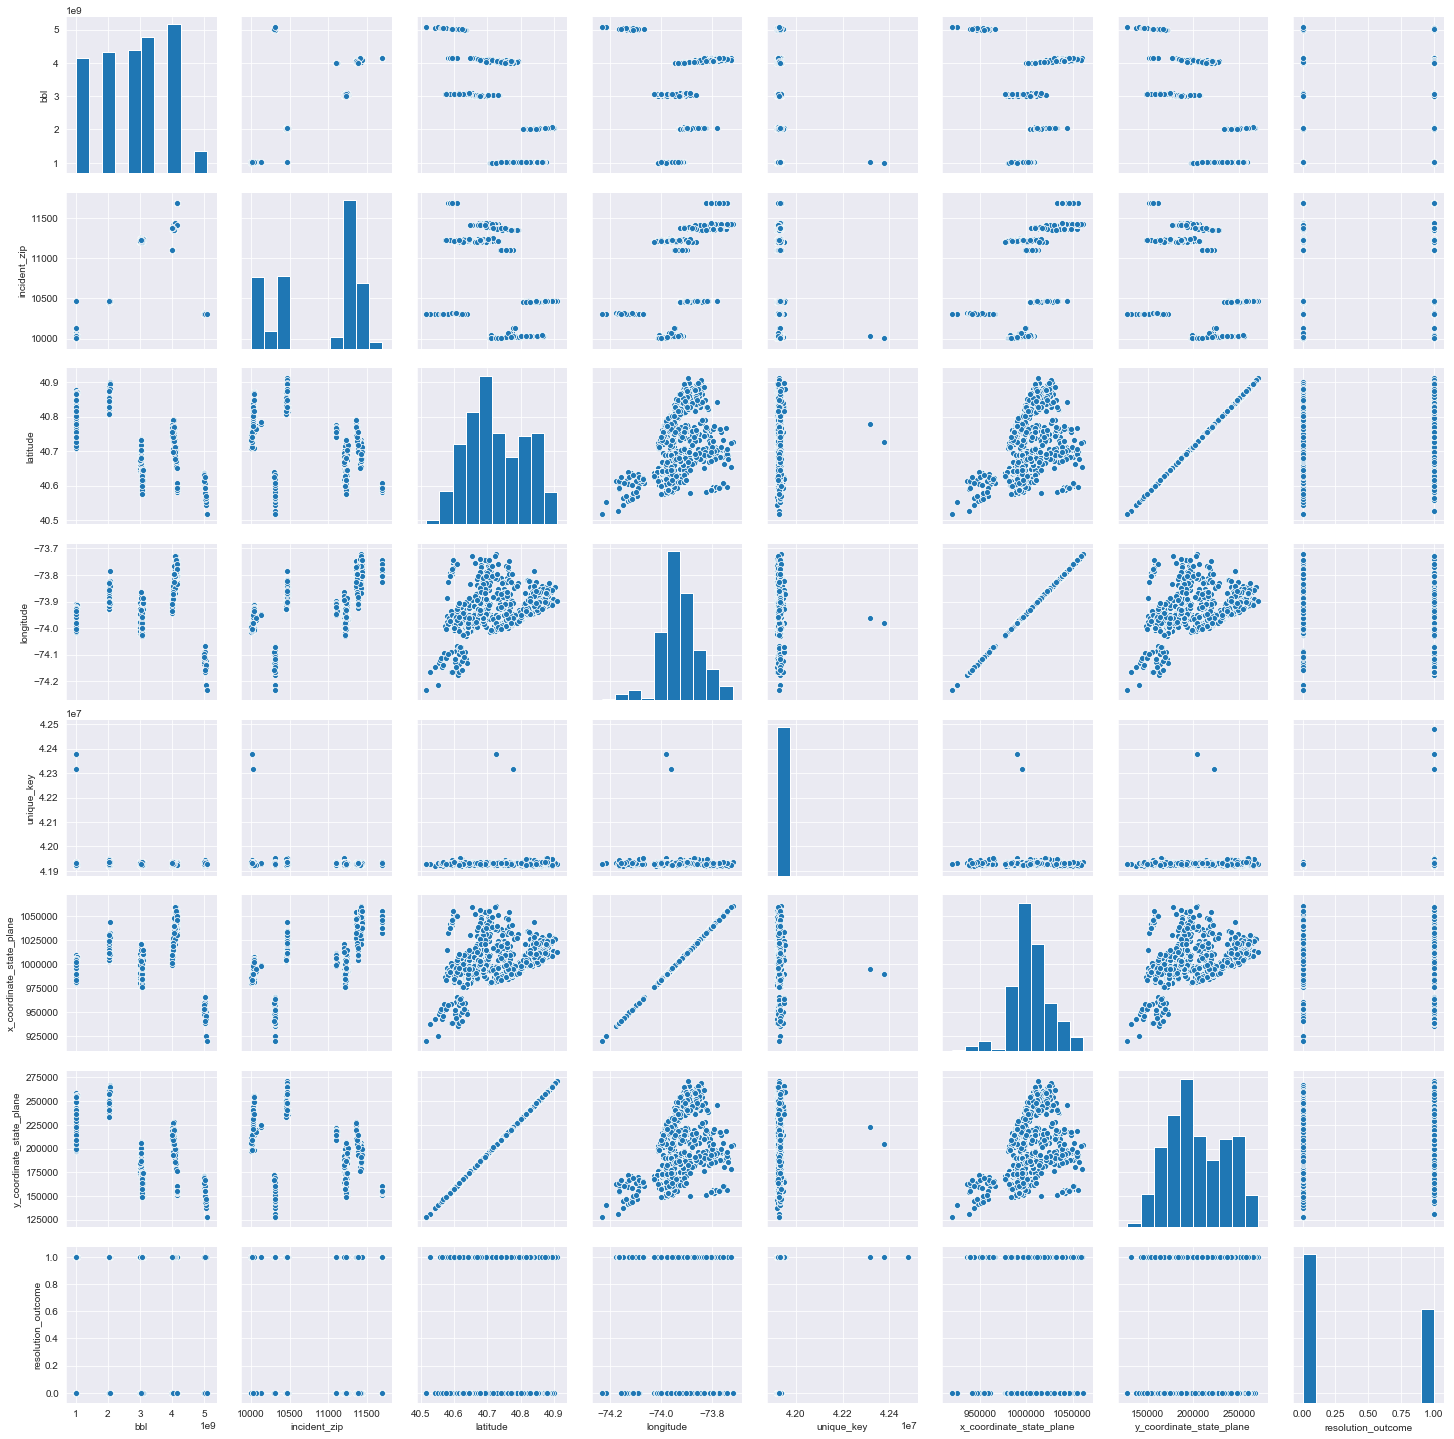

In [307]:
sns.pairplot(data)

In [321]:
data.head()

,address_type,agency,agency_name,bbl,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,...,resolution_description,road_ramp,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,resolution_outcome
0,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.002240e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-04-22T00:00:00.000,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,WATTS STREET,NaN,NaN,41935505,981542.0,203092.0,0
1,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.002240e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-04-22T00:00:00.000,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,WATTS STREET,NaN,NaN,41929434,981542.0,203092.0,0
2,LATLONG,DOHMH,Department of Health and Mental Hygiene,NaN,QUEENS,NaN,NaN,NaN,ELMHURST,2019-04-01T00:00:00.000,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,45 AVENUE,NaN,NaN,41932348,1020716.0,210495.0,0
3,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.020360e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-04-03T00:00:00.000,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,FREDRICK DOUGLASS BOULEVARD,NaN,NaN,41929359,1001052.0,240370.0,0
4,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.005260e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,2019-03-11T00:00:01.000,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,MACDOUGAL STREET,NaN,NaN,41936077,983869.0,204858.0,1


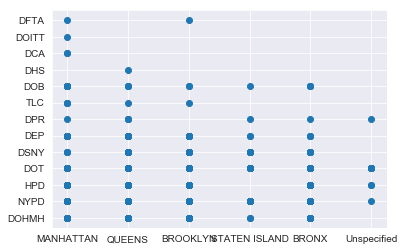

In [336]:
plt.scatter(data['borough'], data['agency'])

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

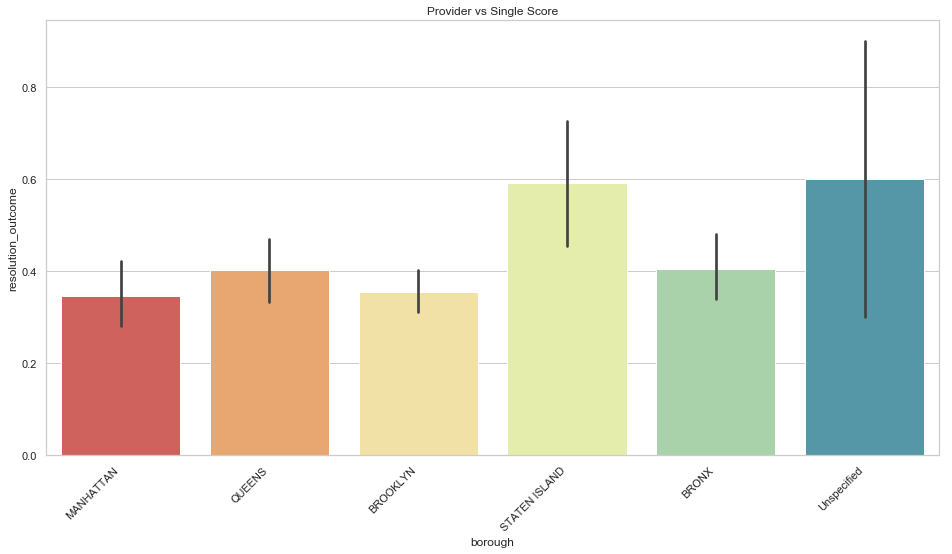

In [339]:
# sns.catplot(x='borough', y='agency', data=data)
# catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="borough", y="resolution_outcome", data=data, palette='Spectral')
ax.set_title("Provider vs Single Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

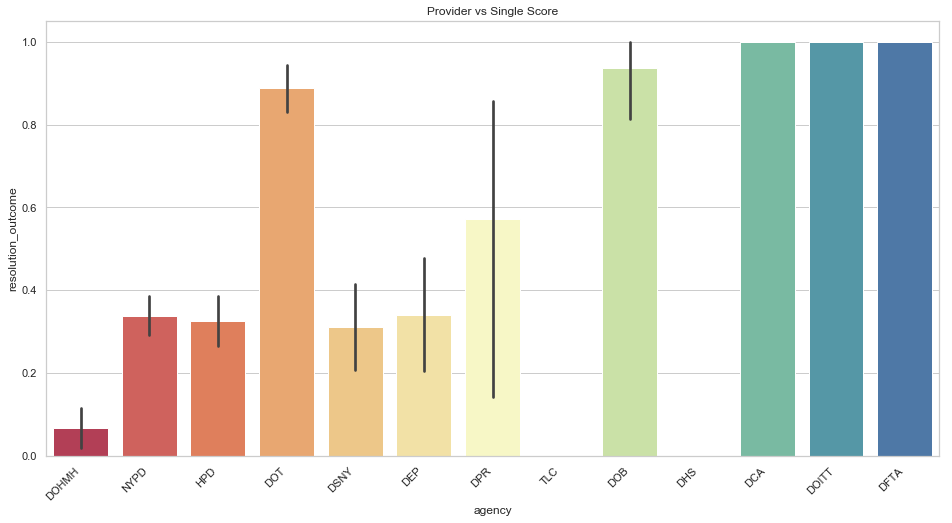

In [353]:
# sns.catplot(x='borough', y='agency', data=data)
# catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="agency", y="resolution_outcome", data=data, palette='Spectral')
ax.set_title("Provider vs Single Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset